In [21]:
import pandas as pd
import os

def merge_csv_files_in_folder(folder_path, activity_label):
    csv_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]

    if not csv_files:
        print(f"No CSV files found in {folder_path}")
        return pd.DataFrame()

    time_file_path = os.path.join(folder_path, "meta/time.csv")

    dataframes = []
    columns_added = []

    time_data = pd.read_csv(time_file_path)
    base_time = pd.to_datetime(time_data.loc[0, 'system time text'])

    for csv_file in csv_files:
        df = pd.read_csv(csv_file)
        df['Activity'] = activity_label
        df['Time_Original'] = df[df.columns[0]]
        df['Cumulative_Time'] = df['Time_Original'].cumsum()
        df['Timestamp'] = base_time + pd.to_timedelta(df['Cumulative_Time'], unit='s')
        dataframes.append(df)

    if not dataframes:
        print(f"No valid dataframes to merge in {folder_path}")
        return pd.DataFrame()

    merged_df = dataframes[0]
    for df in dataframes[1:]:
        added_columns = [col for col in df.columns if col not in merged_df.columns and col != 'Timestamp']
        columns_added.extend(added_columns)
        merged_df = pd.merge_asof(merged_df.sort_values('Timestamp'),
                                  df.sort_values('Timestamp'),
                                  on='Timestamp',
                                  suffixes=('', '_drop'))
        merged_df.drop([col for col in merged_df.columns if 'drop' in col], axis=1, inplace=True)

    print(f"Columns added in {activity_label}: {columns_added}")
    return merged_df


In [22]:
folder_paths = [
    '/content/drive/MyDrive/MLQL/biking',
    '/content/drive/MyDrive/MLQL/running',
    '/content/drive/MyDrive/MLQL/sitting_1',
    '/content/drive/MyDrive/MLQL/sitting_2',
    '/content/drive/MyDrive/MLQL/standing',
    '/content/drive/MyDrive/MLQL/walking_1'
]

activities = [
    'biking',
    'running',
    'sitting',
    'sitting',
    'standing',
    'walking'
]

all_dataframes = []

for idx, folder_path in enumerate(folder_paths):
    activity_label = activities[idx]
    merged_df = merge_csv_files_in_folder(folder_path, activity_label)
    all_dataframes.append(merged_df)

Columns added in biking: ['X (rad/s)', 'Y (rad/s)', 'Z (rad/s)', 'X (m/s^2)', 'Y (m/s^2)', 'Z (m/s^2)', 'Latitude (°)', 'Longitude (°)', 'Height (m)', 'Velocity (m/s)', 'Direction (°)', 'Horizontal Accuracy (m)', 'Vertical Accuracy (°)', 'Distance (cm)', 'X (hPa)']
Columns added in running: ['Distance (cm)', 'X (rad/s)', 'Y (rad/s)', 'Z (rad/s)', 'X (µT)', 'Y (µT)', 'Z (µT)', 'X (hPa)', 'Latitude (°)', 'Longitude (°)', 'Height (m)', 'Velocity (m/s)', 'Direction (°)', 'Horizontal Accuracy (m)', 'Vertical Accuracy (°)']
Columns added in sitting: ['X (µT)', 'Y (µT)', 'Z (µT)', 'X (m/s^2)', 'Y (m/s^2)', 'Z (m/s^2)', 'Latitude (°)', 'Longitude (°)', 'Height (m)', 'Velocity (m/s)', 'Direction (°)', 'Horizontal Accuracy (m)', 'Vertical Accuracy (°)']
Columns added in sitting: ['X (µT)', 'Y (µT)', 'Z (µT)', 'X (rad/s)', 'Y (rad/s)', 'Z (rad/s)', 'Latitude (°)', 'Longitude (°)', 'Height (m)', 'Velocity (m/s)', 'Direction (°)', 'Horizontal Accuracy (m)', 'Vertical Accuracy (°)']
Columns added in

In [23]:
final_df = pd.concat(all_dataframes, ignore_index=True)
final_df = final_df.drop(columns=['Time (s)'])
final_df = final_df.drop(columns=['Time_Original'])
final_df = final_df.drop(columns=['Cumulative_Time'])
final_df.to_csv('/content/drive/MyDrive/MLQL/final_merged_data.csv', index=False)

In [24]:
final_df.head()

,X (µT),Y (µT),Z (µT),Activity,Timestamp,X (rad/s),Y (rad/s),Z (rad/s),X (m/s^2),Y (m/s^2),Z (m/s^2),Latitude (°),Longitude (°),Height (m),Velocity (m/s),Direction (°),Horizontal Accuracy (m),Vertical Accuracy (°),Distance (cm),X (hPa)
0,-5.373880,-10.047367,-48.375580,biking,2024-06-16 16:07:32.260251292+02:00,-0.005521,0.000843,-0.049668,-1.578318,5.744754,7.943681,52.377219,4.803049,0.772721,0.033231,NaN,4.68123,3.451177,5.0,1004.637909
1,-5.586542,-10.195404,-48.440948,biking,2024-06-16 16:07:32.369187042+02:00,-0.016271,-0.019439,-0.044985,-1.990561,5.385351,7.889643,52.377219,4.803049,0.772721,0.033231,NaN,4.68123,3.451177,5.0,1004.637909
2,-5.558708,-10.063683,-47.584656,biking,2024-06-16 16:07:32.577807792+02:00,-0.004071,0.009880,0.016677,-1.647324,5.413942,8.045918,52.377219,4.803049,0.772721,0.033231,NaN,4.68123,3.451177,5.0,1004.637909
3,-5.773348,-10.174835,-47.765808,biking,2024-06-16 16:07:32.886113542+02:00,-0.005396,0.008447,-0.009898,-1.674717,5.359305,8.042326,52.377219,4.803049,0.772721,0.033231,NaN,4.68123,3.451177,5.0,1004.637909
4,-5.672392,-10.348248,-48.112000,biking,2024-06-16 16:07:33.294104292+02:00,-0.005247,0.003708,-0.052898,-1.818119,5.362149,8.056846,52.377219,4.803049,0.772721,0.033231,NaN,4.68123,3.451177,5.0,1004.637909


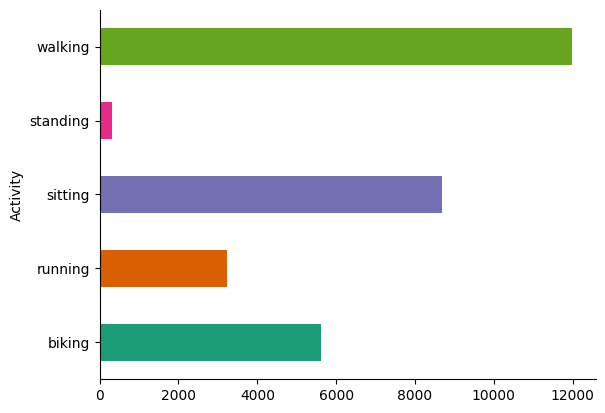

In [25]:
# @title Activity

from matplotlib import pyplot as plt
import seaborn as sns
final_df.groupby('Activity').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)